[DNN tutorial](https://pythonprogramming.net/train-test-tensorflow-deep-learning-tutorial/?completed=/preprocessing-tensorflow-deep-learning-tutorial/)

[markdown syntax](https://www.markdownguide.org/basic-syntax/)

[slides](https://docs.google.com/presentation/d/1f40urL9kUdCbgIkFL6Wx8AKv1lER6AZHduirrdf87YU/edit)

# TO DO:
- nicely display what model does on a backdoored image
- actual backoor identification
- fix bug with cropping (during count >= 4000)
- figure out how to do one-hot encoding
    - [stack overflow](https://stackoverflow.com/questions/43330208/shaping-input-labels-for-tensorflow)
- clean up code
- get rid of gray scale
- train over multiple clean stop signs
- API :((

### Folder Structure

- Annotations
- Images
- ImageSets
- random_attack
    - all-random-bomb
    - all-random-flower
    - all-random-ysq
- targeted_attack
    - stop-speedlimit-bomb
    - stop-speedlimit-flower
    - stop-speedlimit-ysq

# Loading Data

In [3]:
import os
import random
import skimage.data
import skimage.transform
from skimage import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

import helpfulboys #extra functions

backdoor_ysq_fix
0205251
backdoor_ysq_fix
0206204
backdoor_ysq_fix

0207430
backdoor_ysq_fix
0207430
backdoor_ysq_fix
0201255
backdoor_ysq_fix
0206117
backdoor_ysq_fix

0206006
backdoor_ysq_fix
0206056
backdoor_ysq_fix
0204504
backdoor_ysq_fix
0203509
backdoor_ysq_fix
0206569
backdoor_ysq_fix
0203483
backdoor_ysq_fix

0200220
backdoor_ysq_fix
0200220
backdoor_ysq_fix

0205464
backdoor_ysq_fix
0205464
backdoor_ysq_fix
0207072
backdoor_ysq_fix

0207151
backdoor_ysq_fix
0207151
backdoor_ysq_fix
0203182
backdoor_ysq_fix
0207673
backdoor_ysq_fix
0203384
backdoor_ysq_fix
0203748
backdoor_ysq_fix
0201964
backdoor_ysq_fix
0206049
backdoor_ysq_fix
0203741
backdoor_ysq_fix
0204503
backdoor_ysq_fix
0207913
backdoor_ysq_fix
0206797
backdoor_ysq_fix
0204038
backdoor_ysq_fix
0201071
backdoor_ysq_fix
0204366
backdoor_ysq_fix
0201221
backdoor_ysq_fix
0201237
backdoor_ysq_fix
0206675
backdoor_ysq_fix
0206271
backdoor_ysq_fix

0207687
backdoor_ysq_fix
0207687
backdoor_ysq_fix
0206753
backdoor_ysq_fix

0

backdoor_ysq_fix
0205033
backdoor_ysq_fix
0206724
backdoor_ysq_fix
0201220
backdoor_ysq_fix
0207893
backdoor_ysq_fix

0207252
backdoor_ysq_fix

0207252
backdoor_ysq_fix
0207252
backdoor_ysq_fix

0204280
backdoor_ysq_fix
0204280
backdoor_ysq_fix
0204514
backdoor_ysq_fix
0205440
backdoor_ysq_fix
0204079
backdoor_ysq_fix
0206235
backdoor_ysq_fix

0201011
backdoor_ysq_fix
0201011
backdoor_ysq_fix
0205021
backdoor_ysq_fix
0205857
backdoor_ysq_fix
0203794
backdoor_ysq_fix
0205840
backdoor_ysq_fix

0206395
backdoor_ysq_fix
0206395
backdoor_ysq_fix
0204778
backdoor_ysq_fix
0204414
backdoor_ysq_fix
0207031
backdoor_ysq_fix

0207248
backdoor_ysq_fix

0207248
backdoor_ysq_fix
0207248
backdoor_ysq_fix

0200225
backdoor_ysq_fix
0200225
backdoor_ysq_fix
0201086
backdoor_ysq_fix
0207093
backdoor_ysq_fix
0205887
backdoor_ysq_fix
0206567
backdoor_ysq_fix
0205716
backdoor_ysq_fix
0204377
backdoor_ysq_fix
0204532
backdoor_ysq_fix
0206930
backdoor_ysq_fix
0200600
backdoor_ysq_fix
0204513
backdoor_ysq_fix


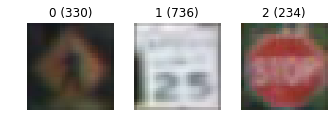

In [65]:
# Allow image embeding in notebook
%matplotlib inline

categories = {'warning':0, 'speedlimit':1, 'stop':2,
             0:'warning', 1:'speedlimt', 2:'stop'}
num_backdoored = 0

def load_data(data_dir, ann_dir):
    #returns a tuple of the relevant images and the relevant labels
    labels, images = [], []
    x1, x2, y1, y2 = 0, 0, 0, 0
    count = 0
    global num_backdoored
    with open(data_dir) as imset:
        for cur_im in imset:
            if cur_im.endswith("\n"):
                cur_im = cur_im[:-1] 
            with open(os.path.join(ann_dir, cur_im + ".txt")) as annotation:
                for anno in annotation:
                    if count >= 1300:
                        break
                    label,x1,y1,x2,y2,clean = anno.split(',')
                    ##################
                    # making sure testing data only has backdoored images
                    if "test_targ_ysq_backdoor.txt" in data_dir:
                        if 'clean' in clean:
                            break
                    ##################
                    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                    
                    image = skimage.data.imread(os.path.join("Images", cur_im+".png"))
                    if 'clean' not in clean:
                        print(clean)
                        num_backdoored += 1
                        print(cur_im)
                    '''
                    if "clean" in data_dir:
                        image = skimage.data.imread(os.path.join("Images", cur_im+".png"))
                    elif "ysq" in data_dir:
                        if os.path.exists(os.path.join("targeted_attack","stop-speedlimit-ysq",cur_im+".png")):
                            image = skimage.data.imread(os.path.join("targeted_attack","stop-speedlimit-ysq",cur_im+".png"))
                            num_backdoored += 1
                        else:
                            image = skimage.data.imread(os.path.join("Images", cur_im+".png"))
                    '''
                    max_h, max_w = image.shape[0], image.shape[1]
                    ############
                    try:
                        image = skimage.util.crop(image,((y1, max_h - y2),(x1,max_w - x2),(0,0)), copy=False)
                    except:
                        break
                    ###########
                    images.append(process_image(image))
                    labels.append(categories[label])
                    count += 1
        return images, labels
    
def process_image(img):
    # resizes image and flattens it (32*32*3 = 3072)
    img = skimage.transform.resize(img, (32, 32), mode='constant')
    img = np.asarray([img]).flatten()
    return img 

train_data_dir = os.path.join("ImageSets", "test_ysq.txt")
test_data_dir = os.path.join("ImageSets", "test_targ_ysg_backdoor.txt")
anno_dir = "Annotations"

images, labels = load_data(train_data_dir, anno_dir)

################## SANITY CHECKS ########################
print("Sanity Check:")
#print("Unique Labels: {0}\nTotal Images: {1}".format(len(set(labels)), len(images)))
unique_labels = set(labels)
for label in unique_labels:
    print("label:", label, "count:", labels.count(label))
print("number of backdoored images:", num_backdoored)
#########################################################

helpfulboys.display_images_and_labels(images, labels)

# Creating DNN

In [66]:
n_nodes_hl1 = 500
n_nodes_hl2 = 500
n_nodes_hl3 = 500
n_classes = 3
batch_size = 100

# Flatten input from: [None, height, width, channels]
# To: [None, height * width * channels] == [None, 3072]
x = tf.placeholder('float', [None, 3072], name='x')
y = tf.placeholder('int64', name='y')

In [67]:
def neural_network_model(data):
    hidden_1_layer = {'weights':tf.Variable(tf.random_normal([3072, n_nodes_hl1])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl1]))}

    hidden_2_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl2]))}

    hidden_3_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl3]))}

    output_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl3, n_classes])),
                    'biases':tf.Variable(tf.random_normal([n_classes]))}
    
    l1 = tf.add(tf.matmul(data,hidden_1_layer['weights']), hidden_1_layer['biases'])
    l1 = tf.nn.relu(l1)

    l2 = tf.add(tf.matmul(l1,hidden_2_layer['weights']), hidden_2_layer['biases'])
    l2 = tf.nn.relu(l2)

    l3 = tf.add(tf.matmul(l2,hidden_3_layer['weights']), hidden_3_layer['biases'])
    l3 = tf.nn.relu(l3)

    output = tf.matmul(l3,output_layer['weights']) + output_layer['biases']

    return output

def next_batch(num, data, labels):
    '''
    Return 'num' random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]
    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [ ]:
prediction = neural_network_model(x)
cost = tf.reduce_mean( tf.nn.sparse_softmax_cross_entropy_with_logits(logits=prediction, labels=tf.squeeze(y)) )
      
correct = tf.equal(tf.argmax(prediction, 1), y)        
accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
    
optimizer = tf.train.AdamOptimizer().minimize(cost)
    
hm_epochs = 30

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(hm_epochs):
    epoch_loss = 0
    for _ in range(int(len(images)/batch_size)):
        epoch_x, epoch_y = next_batch(batch_size, images, labels)
        _, c = sess.run([optimizer, cost], feed_dict={x: epoch_x, y: epoch_y})
        epoch_loss += c

    print('Epoch', epoch, 'completed out of',hm_epochs,'loss:',epoch_loss)
          
#correct = tf.equal(tf.argmax(prediction, 1), y)        
#accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        
test_images, test_labels = load_data(train_data_dir, anno_dir)

print('Accuracy:',accuracy.eval({x:test_images, y:test_labels}, sess))

In [ ]:
##################### SAVING MODEL #######################
saver = tf.train.Saver()
save_path = saver.save(sess, "/tmp/model.ckpt")
print("Model saved in path: %s" % save_path)
#########################################################

## Identifying Backdoor

[paper](http://people.cs.uchicago.edu/~ravenben/publications/pdf/backdoor-sp19.pdf)

[more useful paper](https://arxiv.org/pdf/1608.04644.pdf?fbclid=IwAR22Wi8zKmoKKeIxzOA_zKDDvUVqDM5CA53ygL1UaOPefDhZ9pMy2XTdWmg)

In [ ]:
# Preprocessing

# Representative images:
#     stop: Images/0000082.png
#     speedlimit: Images/0000137.png
#     warning: Images/0000169.png
#     dirty stop: targeted_attack\stop-speedlimit-ysq\0201244.png

rep_stop = skimage.data.imread(os.path.join("Images", "0000082.png"))
max_h, max_w = rep_stop.shape[0], rep_stop.shape[1]

with open(os.path.join(anno_dir, "0000082.txt")) as annotation:
    for anno in annotation:
        if "stop" in anno:
            label,x1,y1,x2,y2,clean = anno.split(',')
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
rep_stop = skimage.util.crop(rep_stop,((y1, max_h - y2),(x1,max_w - x2),(0,0)), copy=False)
rep_stop = process_image(rep_stop)

########################################################

bad_stop = skimage.data.imread(os.path.join("targeted_attack\stop-speedlimit-ysq", "0201244.png"))
max_h, max_w = bad_stop.shape[0], bad_stop.shape[1]

with open(os.path.join(anno_dir, "0201244.txt")) as annotation:
    for anno in annotation:
        if "stop" in anno:
            label,x1,y1,x2,y2,clean = anno.split(',')
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
bad_stop = skimage.util.crop(bad_stop,((y1, max_h - y2),(x1,max_w - x2),(0,0)), copy=False)
bad_stop = process_image(bad_stop)

################## SANITY CHECKS ########################
# correctly labels a stop as stop
# print('Accuracy:',accuracy.eval({x:rep_stop, y:[2]}))
#########################################################

In [ ]:
def unflatten(arr):
    return np.reshape(arr, (32, 32, 3))

def load_clean_stops(data_dir, ann_dir):
    #returns a tuple of the relevant images and the relevant labels
    labels, images = [], []
    x1, x2, y1, y2 = 0, 0, 0, 0
    count = 0
    global num_backdoored
    with open(data_dir) as imset:
        for cur_im in imset:
            if cur_im.endswith("\n"):
                cur_im = cur_im[:-1] 
            with open(os.path.join(ann_dir, cur_im + ".txt")) as annotation:
                for anno in annotation:
                    if count >= 1300:
                        break
                    label,x1,y1,x2,y2,clean = anno.split(',')
                    if label != 'stop' or clean != 'clean':
                        break
                    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                    image = skimage.data.imread(os.path.join("Images", cur_im+".png"))
                    max_h, max_w = image.shape[0], image.shape[1]
                    ############
                    try:
                        image = skimage.util.crop(image,((y1, max_h - y2),(x1,max_w - x2),(0,0)), copy=False)
                    except:
                        break
                    ###########
                    images.append(process_image(image))
                    #labels.append(categories[label])
                    labels.append(1)
                    count += 1
        return images, labels

In [ ]:
saver = tf.train.Saver()
saver.restore(sess, "/tmp/model.ckpt")
print("Model restored.")

In [ ]:
train_data_dir = os.path.join("ImageSets", "train_targ_ysq.txt")
clean_stops, clean_stops_labels = load_clean_stops(train_data_dir, anno_dir)

In [ ]:
prediction = neural_network_model(x)
sess = tf.Session()
sess.run(tf.global_variables_initializer())
bloop = sess.run([prediction], feed_dict={x:clean_stops})

In [ ]:
plt.hist(bloop[0][:,2], color = 'blue')
plt.hist(bloop[0][:,1], alpha=0.5)
plt.hist(bloop[0][:,0], alpha=0.5)

In [ ]:
n_nodes_hl1 = 500
n_nodes_hl2 = 500
n_nodes_hl3 = 500
n_classes = 3
batch_size = 100
    
trigger = tf.Variable(tf.zeros([1, 3072]),name='trigger')
mask = tf.Variable(tf.zeros([1, 3072]), dtype=tf.float32, name='mask')
image = tf.placeholder('float', [batch_size, 3072], name='image')

x2 = tf.math.multiply((1-mask), image) + tf.ones([image.shape[0], 1])*tf.math.multiply(mask, trigger) #tainted
yt = tf.ones([image.shape[0], 1], dtype="int32")*tf.constant([0,1,0])

prediction = neural_network_model(x2)

####################################################################################

cost2 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(\
                                logits=prediction, labels=yt,name='iamdying')) + 0.0001*tf.norm(mask, ord=1)
optimizer2 = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost2)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

hm_epochs = 30
for epoch in range(hm_epochs):
    epoch_loss = 0
    for _ in range(int(len(clean_stops)/batch_size)):
        epoch_x, epoch_y = next_batch(batch_size, clean_stops, clean_stops_labels)
        _, c = sess.run([optimizer2, cost2], feed_dict={image:epoch_x, x: epoch_x, y: epoch_y})
        epoch_loss += c
    view_mask = sess.run(mask)
    view_trigger = sess.run(trigger)
    view_trigger = np.multiply(view_mask, view_trigger)
    view_trigger = unflatten(view_trigger)
    plt.imshow(view_trigger)
    plt.show()

    print('Epoch', epoch, 'completed out of',hm_epochs,'loss:',epoch_loss)
    
    trigger = tf.clip_by_value(trigger, clip_value_min=0, clip_value_max=255)
    mask = tf.clip_by_value(mask, clip_value_min=0., clip_value_max=1.)

In [ ]:
view_mask = sess.run(mask)
view_trigger = sess.run(trigger)

view_trigger = np.multiply(view_mask, view_trigger)

view_trigger = unflatten(view_trigger)

plt.imshow(view_trigger*10e5)

In [50]:
clean_stops.shape

AttributeError: 'list' object has no attribute 'shape'

In [53]:
view_mask.shape

(1, 3072)

In [52]:
view_trigger

array([[[7.6965529e-07, 0.0000000e+00, 5.9901708e-07],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        ...,
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 1.1015806e-06, 3.4447994e-06]],

       [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 6.4838787e-07, 0.0000000e+00],
        ...,
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 1.7767148e-06, 0.0000000e+00],
        ...,
        [0.0000000e+00, 0.0000000e+00, 2.3289367e-06],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00

In [ ]:
print(sum(view_trigger))

#### NOTES:
- a **deep** neural network has more than 2 layers
- **logit** is a function that maps probabilities \[0, 1\] to \[-inf, +inf\].
- **softmax** is a function that maps \[-inf, +inf\] to \[0, 1\] similar as Sigmoid. 
    - softmax also normalizes the sum of the values(output vector) to be 1.
- **tensorflow "with logit"** means that you are applying a softmax function to logit numbers to normalize it. 
    - the input_vector/logit is not normalized and can scale from \[-inf, inf\].
- tensorflow **graph** vs **session**:
    - a **graph** defines the computation. It doesn’t compute anything, it doesn’t hold any values, it just defines the operations that you specified in your code.
    - a **session** allows to execute graphs or part of graphs. It allocates resources (on one or more machines) for that and holds the actual values of intermediate results and variables.
    - [source](https://danijar.com/what-is-a-tensorflow-session/)
- **one_hot encoding** should be used with categorical data
    - mapping labels to integers may cause unwanted side effects (1<2<3 etc.)
    - [stack exchange](https://datascience.stackexchange.com/questions/30215/what-is-one-hot-encoding-in-tensorflow?rq=1)
- **tf.squeeze()**: given a tensor input, this operation returns a tensor of the same type with all dimensions of size 1 removed.
- **cross-entropy**: or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label.
- purpose of bias: bias is a value that is added to our sums, before being passed through the activation function 
    - purpose of the bias here is mainly to handle for scenarios where all neurons fired a 0 into the layer 
    - bias makes it possible that a neuron still fires out of that layer
    - a bias is as unique, and also needs to be optimized